<a href="https://colab.research.google.com/github/plaban1981/NLP-with-Python/blob/master/Spacy_semantics_word_vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Command Line download for md - medium spacy models , lg- large models

In [1]:
#!python -m spacy download en_core_web_md
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


## Word2Vec - it is a two layer neural network that procesess text.

input : text corpus

output : feature vectors for the words in the corpus

The purpose and usefulness of the Word2Vec is to group the vectors of similar words together in a vector space.

It detects similarity mathematically. It makes highly accurate guesses about a word's meaning based on the past apperances.

Word2Vec trains  words against other words in the neighbor in the input corpus.
Two ways of training :

- Continuous Bag of Words (CBOW)
- Skip-Gram - using a word to predict the context

**cosine similarity to measure how similar word vectors are to each other**

https://stackoverflow.com/questions/56927602/unable-to-load-the-spacy-model-en-core-web-lg-on-google-colab

In [2]:
!pip install spacy

In [0]:
import spacy


In [0]:
nlp = spacy.load('en_core_web_lg')

In [5]:
nlp('lion').vector.shape

(300,)

In [6]:
tokens = nlp('Lions Cats Pets')
for token1 in tokens:
  for token2 in tokens:
    print(token1.text,token2.text,token1.similarity(token2))

Lions Lions 1.0
Lions Cats 0.5250695
Lions Pets 0.36134514
Cats Lions 0.5250695
Cats Cats 1.0
Cats Pets 0.75530803
Pets Lions 0.36134514
Pets Cats 0.75530803
Pets Pets 1.0


#### Words used in similar context are similar even though the word might have different meanings

In [7]:
tokens = nlp('Like Love Hate')
for token1 in tokens:
  for token2 in tokens:
    print(token1.text,token2.text,token1.similarity(token2))

Like Like 1.0
Like Love 0.657904
Like Hate 0.65746516
Love Like 0.657904
Love Love 1.0
Love Hate 0.63930994
Hate Like 0.65746516
Hate Love 0.63930994
Hate Hate 1.0


In [8]:
nlp.vocab.vectors.shape

(684831, 300)

In [9]:
tokens = nlp('dogs cats piku')
for token in tokens:
  print(token.text,token.has_vector,token.vector_norm,token.is_oov)

dogs True 7.193099 False
cats True 6.933004 False
piku False 0.0 True


## Vector arithmetic
Believe it or not, we can actually calculate new vectors by adding & subtracting related vectors. A famous example suggests
<pre>"king" - "man" + "woman" = "queen"</pre>

In [10]:
from scipy import spatial
cosine_similarity = lambda x,y : 1 - spatial.distance.cosine(x,y)

king = nlp.vocab['king'].vector
man = nlp.vocab['man'].vector
woman = nlp.vocab['woman'].vector

# Now we find the closest vector in the vocabulary to the result of "man" - "woman" + "queen"
new_vector = king - man + woman
computed_similarities = []

for word in nlp.vocab :
  if word.has_vector:
    if word.is_lower:
      if word.is_alpha:
        similarity = cosine_similarity(new_vector,word.vector)
        computed_similarities.append((word,similarity))

computed_similarities = sorted(computed_similarities, key=lambda item: -item[1])
#computed_similarities = sorted(computed_similarities)
print(computed_similarities[:10])
print([w[0].text for w in computed_similarities[:10]])

[(<spacy.lexeme.Lexeme object at 0x7f6338aa2168>, 0.8024259805679321), (<spacy.lexeme.Lexeme object at 0x7f63380ab240>, 0.7880843877792358), (<spacy.lexeme.Lexeme object at 0x7f6337ac2558>, 0.6401076912879944), (<spacy.lexeme.Lexeme object at 0x7f6337fbed80>, 0.6208544373512268), (<spacy.lexeme.Lexeme object at 0x7f63381024c8>, 0.6125636100769043), (<spacy.lexeme.Lexeme object at 0x7f63392da1b0>, 0.5800970792770386), (<spacy.lexeme.Lexeme object at 0x7f63374504c8>, 0.5787012577056885), (<spacy.lexeme.Lexeme object at 0x7f6338eb4480>, 0.5743793845176697), (<spacy.lexeme.Lexeme object at 0x7f633953bdc8>, 0.563362181186676), (<spacy.lexeme.Lexeme object at 0x7f633772f750>, 0.5520980954170227)]
['king', 'queen', 'prince', 'kings', 'princess', 'royal', 'throne', 'queens', 'monarch', 'kingdom']


## VADER - Valence Aware Dictionary for sEntiment Reasoning 

#### It is a model for text sentiment analysis that is sensitive to both ploarity(positive/negative) and intensity-strength of emotions.

#### It can be applied to unlabeled text data

#### map lexical features to sentiment scores

#### sentiment scores obtained by summing up the intensity of each word in the text

#### it also understands capitalization and punctuations

In [11]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


##VADER's `SentimentIntensityAnalyzer()` takes in a string and returns a dictionary of scores in each of four categories:
* negative
* neutral
* positive
* compound *(computed by normalizing the scores above)*

In [13]:
a = 'This was a good movie.'
sid.polarity_scores(a)

{'compound': 0.4404, 'neg': 0.0, 'neu': 0.508, 'pos': 0.492}

In [14]:
a = 'This was the best, most awesome movie EVER MADE!!!'
sid.polarity_scores(a)

{'compound': 0.8877, 'neg': 0.0, 'neu': 0.425, 'pos': 0.575}

In [15]:
a = 'This was the worst film to ever disgrace the screen.'
sid.polarity_scores(a)

{'compound': -0.8074, 'neg': 0.477, 'neu': 0.523, 'pos': 0.0}

## Compound_scores :

* > 0 positive sentiment
* < 0 negative sentiment
* = 0 neutral sentiment

## Use VADER to analyze Amazon Reviews
For this exercise we're going to apply `SentimentIntensityAnalyzer` to a dataset of 10,000 Amazon reviews. Like our movie reviews datasets, these are labeled as either "pos" or "neg". At the end we'll determine the accuracy of our sentiment analysis with VADER.

In [16]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/amazonreviews.tsv',sep='\t')
data.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [17]:
data['label'].value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

##Clean null values

In [18]:
data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

In [0]:
blanks = []
for ix,lb,rv in data.itertuples():
  if type(rv) == str:
    if rv.isspace():
      blanks.append(ix)

In [20]:
blanks

[]

##Let's run the first review through VADER


In [21]:
sid.polarity_scores(data['label'].iloc[0])

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

##Adding Scores and Labels to the DataFrame

In [22]:
data['score'] = data['review'].apply(lambda review : sid.polarity_scores(review))
data.head()

,label,review,score
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co..."
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co..."
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com..."
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com..."
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp..."


In [23]:
data['compound_score'] = data['score'].apply(lambda score : score['compound'])
data.head()

,label,review,score,compound_score
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781


In [24]:
data['compound_label'] = data['compound_score'].apply(lambda label: 'pos' if label >= 0 else 'neg')
data.head()

,label,review,score,compound_score,compound_label
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454,pos
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957,pos
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858,pos
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814,pos
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781,pos


##Report on Accuracy

In [25]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(classification_report(data['label'],data['compound_label']))

              precision    recall  f1-score   support

         neg       0.86      0.51      0.64      5097
         pos       0.64      0.91      0.75      4903

    accuracy                           0.71     10000
   macro avg       0.75      0.71      0.70     10000
weighted avg       0.75      0.71      0.70     10000



In [26]:
print(confusion_matrix(data['label'],data['compound_label']))

[[2623 2474]
 [ 435 4468]]


Text(33.0, 0.5, 'Actual Values')

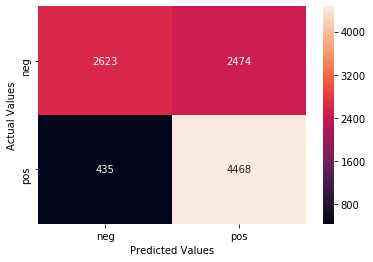

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
df_pred = pd.DataFrame({'Actual Label':data['label'],'Predicted Label':data['compound_label']})
sns.heatmap(confusion_matrix(data['label'],data['compound_label']),annot=True,fmt='g',xticklabels=['neg','pos'],yticklabels=['neg','pos'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

##Accuracy Score

In [28]:
accuracy_score(data['label'],data['compound_label'])

0.7091

####This tells us that VADER correctly identified an Amazon review as "positive" or "negative" roughly 71% of the time.

##Sentiment_Analysis Assesment 

#### Task 1 : Perform Vector Arithmetic

In [0]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [0]:
word1 = nlp.vocab['wolf'].vector
word2 = nlp.vocab['dog'].vector
word3 = nlp.vocab['cat'].vector

In [0]:
from scipy import spatial
cosine_similarity = lambda x,y: 1 - spatial.distance.cosine(x,y)

In [0]:
new_vector = word1 - word2 + word3

In [34]:
new_vector.shape

(300,)

In [0]:
computed_sim = []

for word in nlp.vocab:
  if word.has_vector:
    if word.is_lower:
      if word.is_alpha:
        sim = cosine_similarity(new_vector,word.vector)
        computed_sim.append((word,sim))

####sorting the most similar words to the word arithmetic in decreasing order

In [0]:
computed_sim = sorted(computed_sim,key = lambda items : -items[-1])

In [38]:
print([ word[0].text for word in computed_sim[:10]])

['wolf', 'wolves', 'panther', 'lynx', 'owl', 'tiger', 'lion', 'fox', 'cat', 'otter']


In [0]:
def vector_math(a,b,c):

  word1 = nlp.vocab[a].vector
  word2 = nlp.vocab[b].vector
  word3 = nlp.vocab[c].vector
  new_vector = word1 - word2 + word3
  computed_sim = []
  for word in nlp.vocab:
    if word.has_vector:
      if word.is_lower:
        if word.is_alpha:
          sim = cosine_similarity(new_vector,word.vector)
          computed_sim.append((word,sim))
  computed_sim = sorted(computed_sim,key = lambda items : -items[-1])
  print([ word[0].text for word in computed_sim[:10]])


In [40]:
vector_math('king','man','woman')

['king', 'queen', 'prince', 'kings', 'princess', 'royal', 'throne', 'queens', 'monarch', 'kingdom']


## Task 2 : VADER sentiment analysis on our own review

In [43]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [0]:
review = 'The frozen movie was absolutely amazing and wonderful'

In [46]:
sid.polarity_scores(review)

{'compound': 0.8425, 'neg': 0.0, 'neu': 0.427, 'pos': 0.573}

In [0]:
def reviews(string):
  scores = sid.polarity_scores(string)
  if scores['compound'] == 0:
    return 'netural'
  elif scores['compound'] > 0 :
    return 'positive'
  else:
    return 'negative'

In [48]:
reviews(review)

'positive'